In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# read data, drop id, add new featrue R_C
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
for df in [train_df, test_df]:
    df.drop('id', axis=1, inplace=True)
    df['R_C'] = [f'{r}_{c}' for r, c in zip(df['R'], df['C'])]

In [3]:
gorup_breath_id = train_df.groupby('breath_id')

In [4]:
# unique breath_id in train and test
print('train:', len(train_df.breath_id.unique()))
print('test: ', len(test_df.breath_id.unique()))

train: 75450
test:  50300


In [5]:
# num distribution of time_step in each breath_id
print('train:', train_df.groupby('breath_id').count()['R'].value_counts())
print('test:', test_df.groupby('breath_id').count()['R'].value_counts())

train: 80    75450
Name: R, dtype: int64
test: 80    50300
Name: R, dtype: int64


In [6]:
R_C_breath_id_dict = {}
for R_C in train_df.R_C.unique():
    tmp_df = (gorup_breath_id.first().R_C == R_C).to_frame()
    breath_id = np.random.choice(tmp_df[tmp_df.R_C==True].index, 4)
    R_C_breath_id_dict[R_C] = breath_id
len(R_C_breath_id_dict)

9

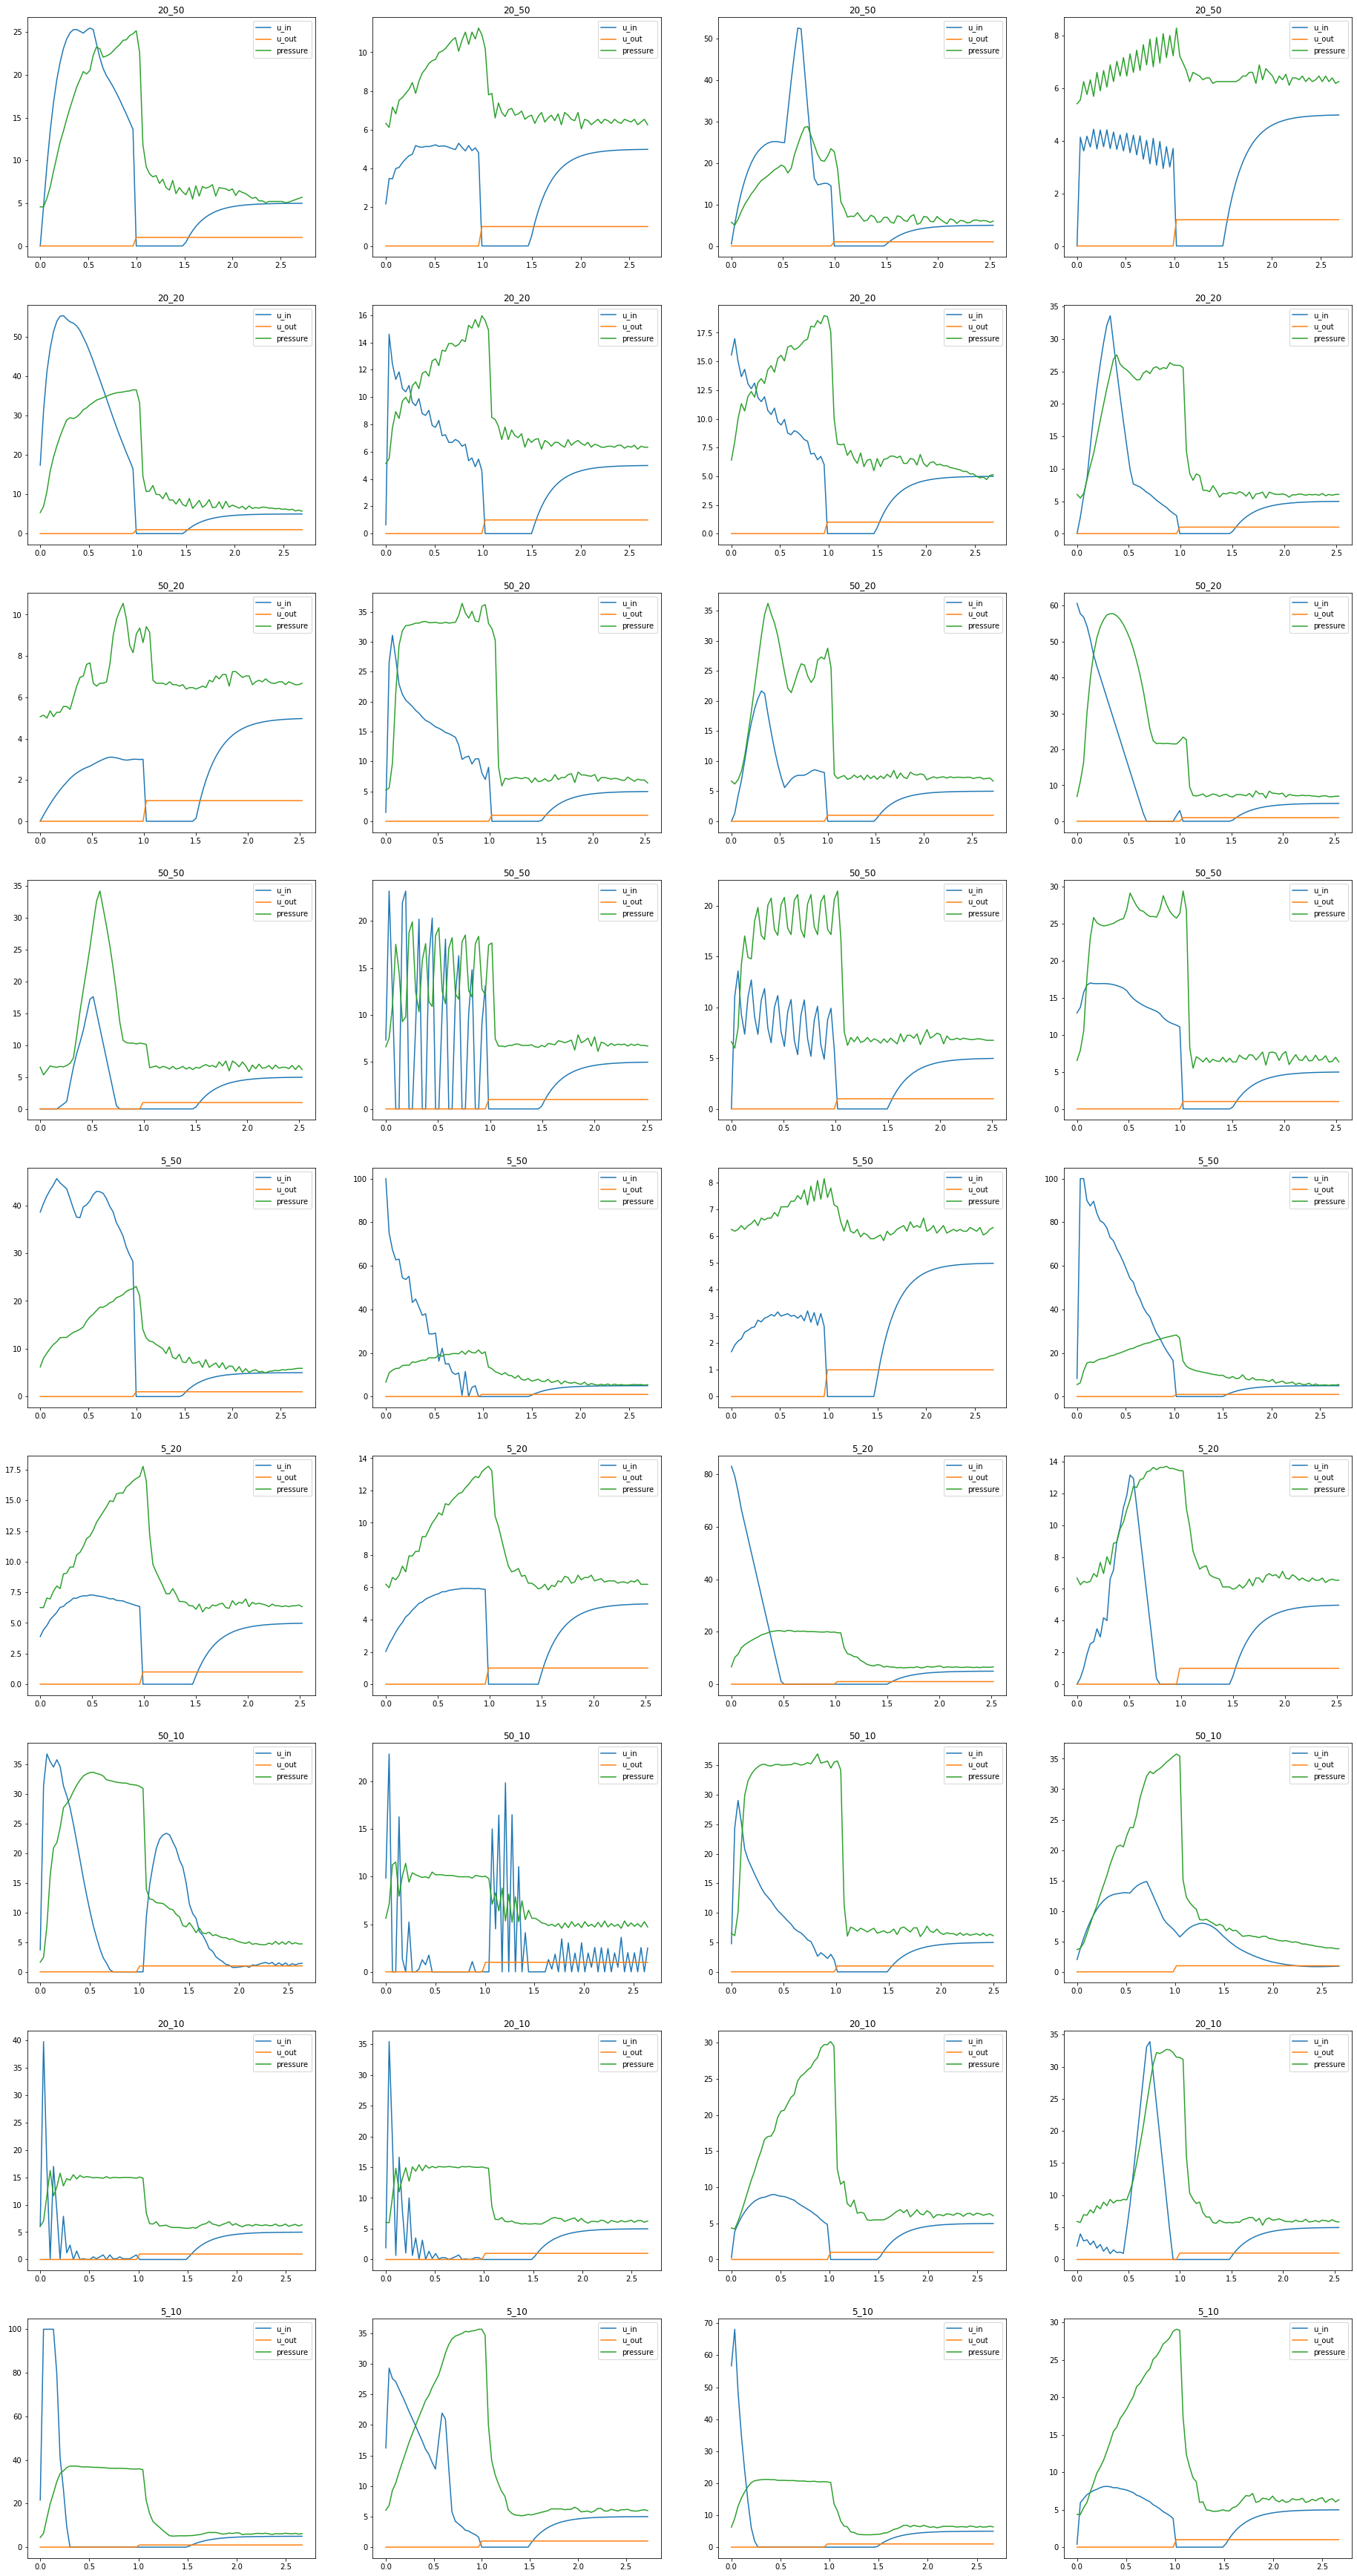

In [7]:
# visualize change of u_in, u_out pressure in one breath_id(1).
_, axes = plt.subplots(9, 4, figsize=(8*4, 7*9))
for idx1, R_C in enumerate(R_C_breath_id_dict):
    for idx2, breath_id in enumerate(R_C_breath_id_dict[R_C]):
        one_breath = train_df[train_df['breath_id'] == breath_id].reset_index(drop=True)
        y_label_list = ['u_in', 'u_out', 'pressure']
        for y_label in y_label_list:
            idx = 4* idx1 + idx2
            ax = sns.lineplot(x=one_breath.time_step, y=one_breath[y_label], label=y_label, ax=axes[idx//4][idx%4])
            ax.set(xlabel=None)
            ax.set(ylabel=None)
            ax.set(title=R_C)

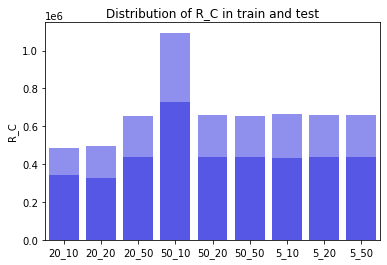

In [8]:
for idx, df in enumerate([train_df, test_df]):
    rc_count = df.R_C.value_counts().sort_index().to_frame()
    sns.barplot(x=rc_count.index, y=rc_count.R_C, color='b', alpha=0.5)
_ = plt.title('Distribution of R_C in train and test')